# Bike Sharing System using Multiple Linear Regression

## Problem Statement
 - Business Case:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

The bike-sharing provider has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as possible so that the economy restores to a healthy state. 

In such an attempt, the company aspires to understand the demand for shared bikes among the people.
The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the market based on some factors. 

## Business Goal:
 - You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Table of Contents:

- Understanding the data:

 - Importing the libraries and reading the data
 - Check the dataset for anomolies
 - Fix data types, missing values or impute
 - Visualize the data
 
 
- Data Preparation:

 - Create dummy variables and binary numbers
 - Split the data into trainning and set
 - Re-scale the variables
 
 
- Trainning the Data:

 - Use RFE to check the top 10 variables
 - Use manual and business understanding to check other variables also.
 
 
- Residual Analysis:

 - Plot residual errors
 
 
- Prediction on Test setup:

 - Use same variables to test the test set
 - Using R2 compare the r-score

## Step-1: Understanding the data:

 - Importing the libraries and reading the data
 - Check the dataset for anomolies
 - Fix data types, missing values or impute
 - Visualize the data

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv(r'C:\Users\Chuggi Narayan\Desktop\Hiran\PY Notebook\October\Module 6 - Machine Learning\Bike Sharing Assignment\day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check for null values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
print(bike.shape)

(730, 16)


#### NOTE: Data Types of the data are not in correct format. And, the columns like season, year, month etc are not in binary encoding which might be a problem while building the model. To visualize the variables, we need them in object format. There are two extra columns `isntant` and `dteday` which do not serve any purpose. `dteday` already has it's information extracted and thus we would not need that columns. And, we can see that there are no missing values in the data.

In [5]:
 # Drop 'instant' and 'dteday' columns
bike.drop(['instant'], axis = 1, inplace = True)
bike.drop(['dteday'], axis = 1, inplace = True)

In [6]:
# Replace binary variables to categorical variables
bike['season'].replace({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'}, inplace = True)

In [7]:
# Replace binary values of column 'yr' with meaningful values
bike['yr'].replace({0 : '2018', 1 : '2019'}, inplace = True)

In [8]:
# Replace the values of 'mnth' columns with corresponding months
bike['mnth'].replace({1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 
                     8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'}, 
                    inplace = True)

In [9]:
# Replace the binary column 'holiday' into categories
bike['holiday'].replace({0 : 'No Holiday', 1 : 'Holiday'}, inplace = True)

In [10]:
# Replace 'weekday' column into corresponding categories
bike['weekday'].replace({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 
                         5 : 'Saturday', 6 : 'Sunday'}, inplace = True)

In [11]:
# Replace 'workingday' column into corresponding categories
bike['workingday'].replace({0 : 'Working Day', 1 : 'Holiday_w'}, inplace = True)

In [12]:
# Replace 'weathersit' column into corresponding categories
bike['weathersit'].replace({1 : 'Clear', 2 : 'Cloudy', 3 : 'Light Rain', 4 : 'Heavy Rain'}, inplace = True)

## Perform EDA:
 - Boxplot of all the categorical vairbales against the target variable 'cnt'
 - Scatter Plot of all the numerical variable against the target variable 'cnt'
 - Co-relations of all the variables against each other

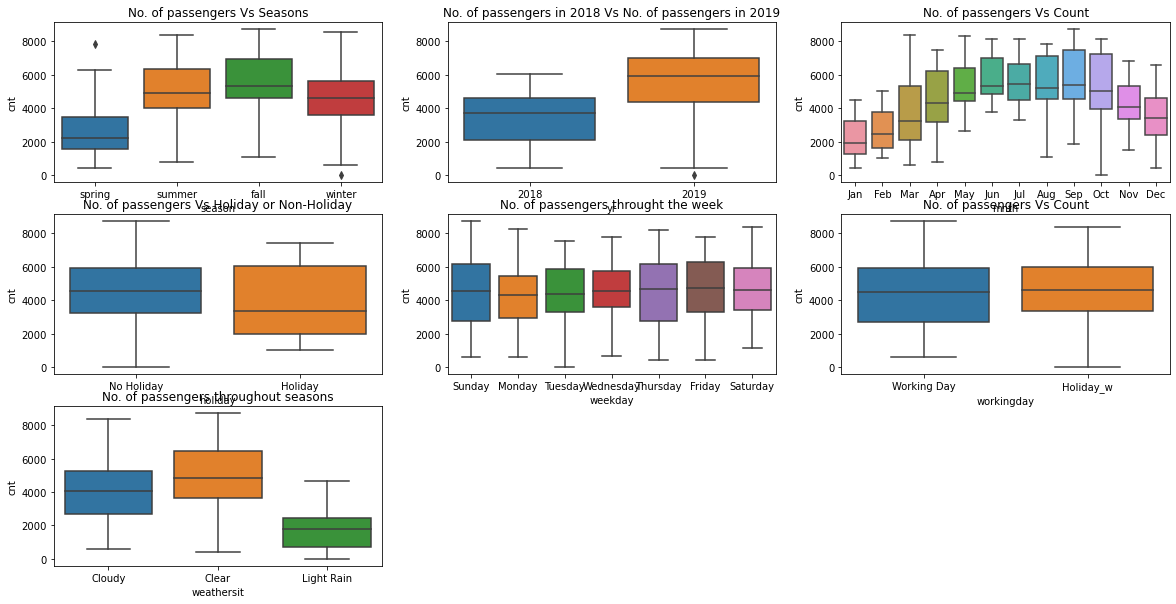

In [13]:
# Plotting box plot for all categorical variables againt the target variable 'cnt'
plt.figure(figsize = (20, 10))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike).set_title("No. of passengers Vs Seasons")

plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike).set_title("No. of passengers in 2018 Vs No. of passengers in 2019")

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike).set_title("No. of passengers Vs Count")

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike).set_title("No. of passengers Vs Holiday or Non-Holiday")

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike).set_title("No. of passengers throught the week")

plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike).set_title("No. of passengers Vs Count")

plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike).set_title("No. of passengers throughout seasons")

plt.show()

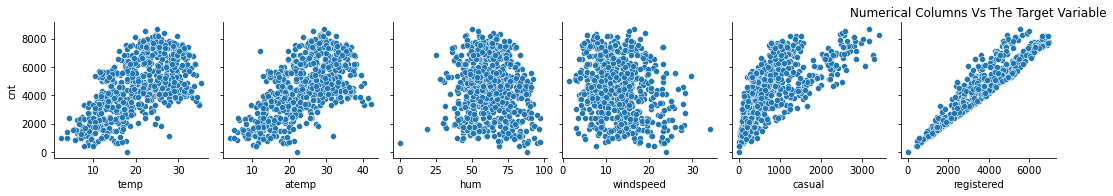

In [14]:
# Plot scatter plots for numerical variable against target variable
sns.pairplot(bike, x_vars=['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'], y_vars = 'cnt')
plt.title("Numerical Columns Vs The Target Variable")
plt.show()

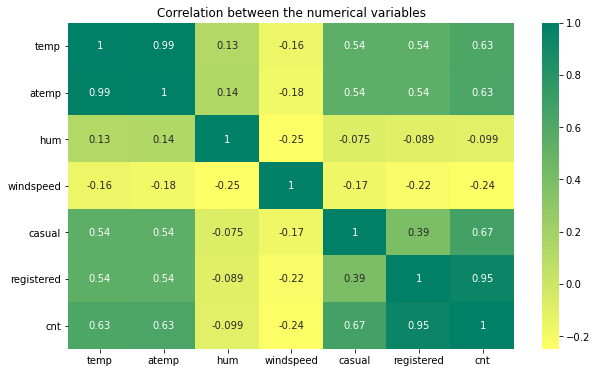

In [15]:
# Plot heatmap for all variables
plt.figure(figsize = (10, 6))
sns.heatmap(bike.corr(), annot = True, cmap = 'summer_r')
plt.title("Correlation between the numerical variables")
plt.show()

## Step-2: Data Preparation:
 - Create dummy variables and binary numbers
 - Split the data into trainning and set
 - Re-scale the variables

In [16]:
# Create dummy variables for categorical varibales in a new datframe
dummy_vars = pd.get_dummies(bike[['yr', 'holiday', 'workingday', 'season', 'mnth', 'weekday', 'weathersit']],
                          drop_first = True)
dummy_vars.head()

,yr_2019,holiday_No Holiday,workingday_Working Day,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light Rain
0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [17]:
# Concatenate the dataframes
final = pd.concat([bike, dummy_vars], axis = 1)
final.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_Working Day,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light Rain
0,spring,2018,Jan,No Holiday,Sunday,Working Day,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,spring,2018,Jan,No Holiday,Monday,Working Day,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,spring,2018,Jan,No Holiday,Tuesday,Holiday_w,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,spring,2018,Jan,No Holiday,Wednesday,Holiday_w,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,No Holiday,Thursday,Holiday_w,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [18]:
# Drop columns of dummy variables
final = final.drop(['season','yr','holiday','mnth','workingday','weekday','weathersit'],axis=1)
final.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_Working Day,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [19]:
# Create train and test from dataframe
df_train, df_test = train_test_split(final, train_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(219, 32)
(511, 32)


In [20]:
# Object creation
scaler = MinMaxScaler()

# Create a variable list to be scaled
var_scale = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Scale the variables
df_train[var_scale] = scaler.fit_transform(df_train[var_scale])
df_train.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_Working Day,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light Rain
519,0.669039,0.687601,0.518413,0.518178,0.351423,0.847716,0.828017,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
517,0.648873,0.670296,0.584491,0.305497,0.921906,0.755115,0.969487,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
132,0.548043,0.566443,0.918865,0.290701,0.226009,0.461006,0.463245,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
26,0.096085,0.170293,0.731722,0.148104,0.001985,0.000000,0.000000,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
291,0.589664,0.594644,0.952799,0.428376,0.081072,0.269805,0.251292,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


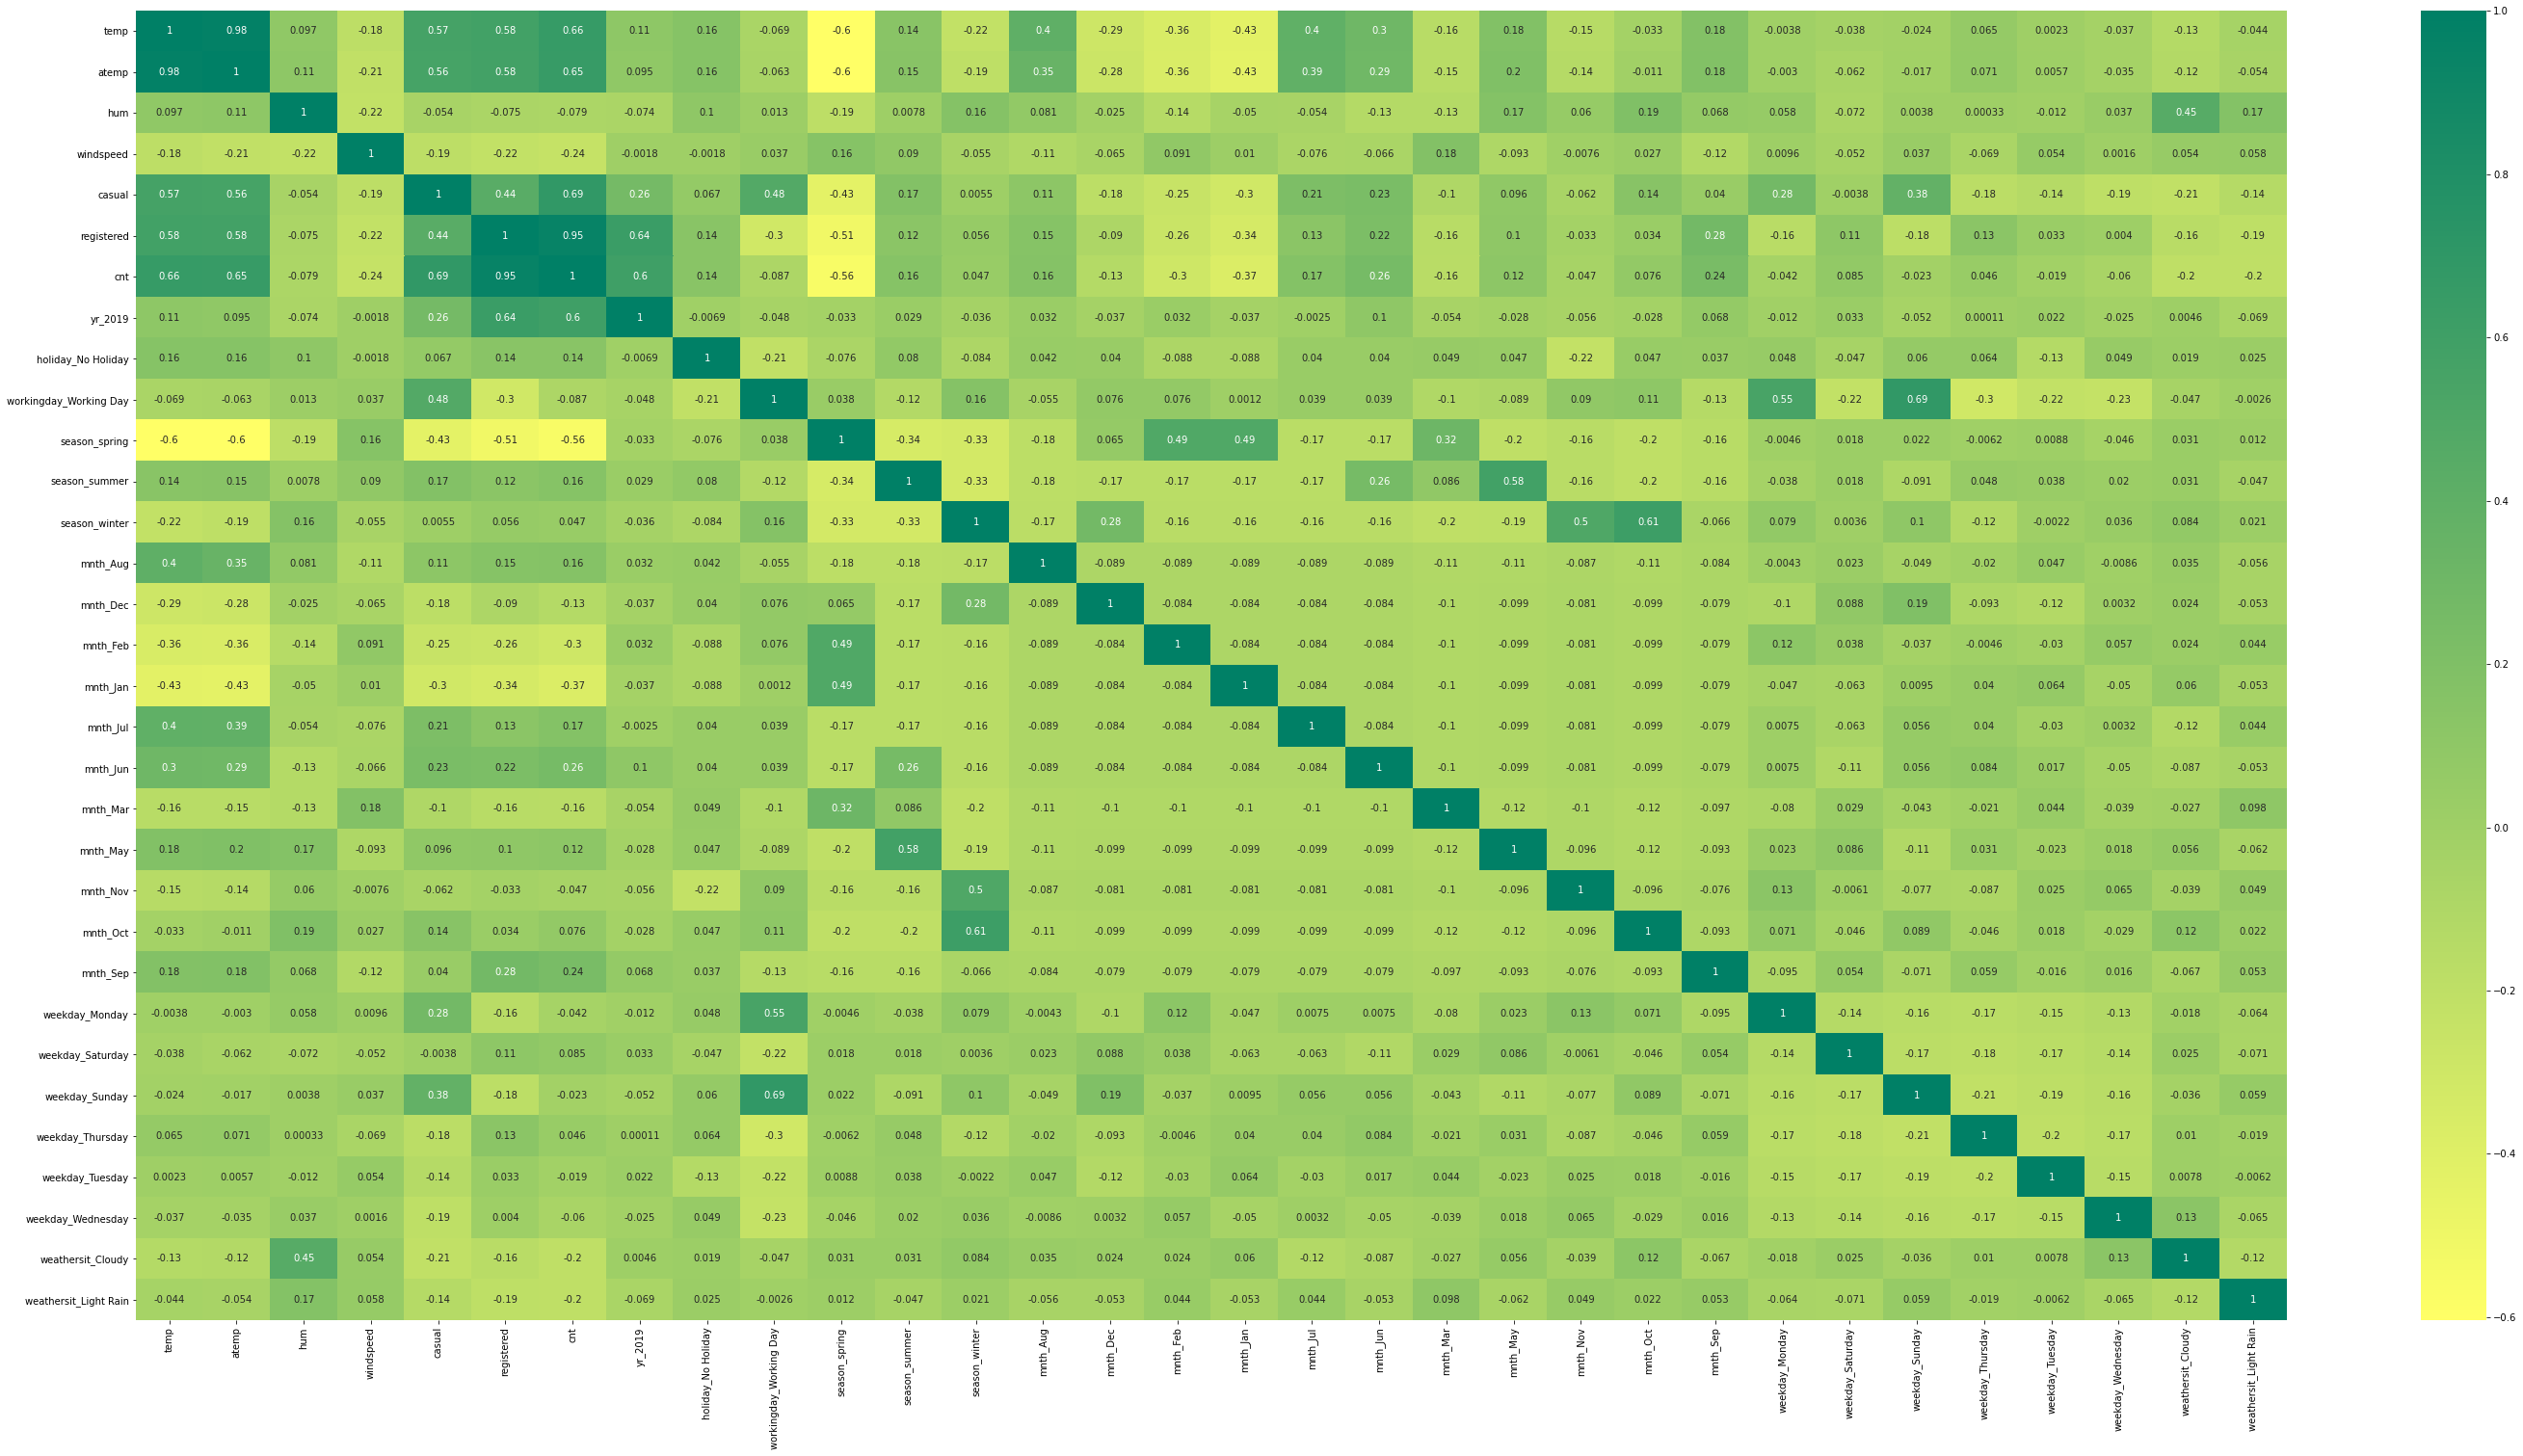

In [21]:
# Plot a heat map to check correlation between dummy variables
plt.figure(figsize = (50, 25))
sns.heatmap(df_train.corr(), annot = True, cmap = 'summer_r')
plt.show()

In [22]:
# Split the df_train into X_train and y_train
y_train = df_train.pop('cnt')
X_train = df_train

## Step-3: Training the Data:
 - Backward Selection: Use all variables to build a model and drop the features one by one which has high P-value or high VIF

In [23]:
#Buid model with all the variables
X_train_xm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_xm).fit()

lr_2.params
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.056e+28
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:24:26   Log-Likelihood:                 7028.1
No. Observations:                 219   AIC:                        -1.399e+04
Df Residuals:                     188   BIC:                        -1.389e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0006   2.18e-15  -2.78e+11      0.000      -0.001      -0.001
temp                     1.11e-15   5.15e-15      0.216      0.829   -9.04e-15    1.13e-14
atemp                  -1.221e-15   4.84e-15     -0.252      0.801   -1.08e-14    8.33e-15
hum                     8.465e-16   1.88e-15      0.450      0.653   -2.86e-15    4.56e-15
windspeed               4.163e-16   1.43e-15      0.292      0.771    -2.4e-15    3.23e-15
casual                     0.3810   2.06e-15   1.85e+14      0.000       0.381       0.381
registered                 0.8197   2.39e-15   3.43e+14      0.000       0.820       0.820
yr_2019                 3.973e-16   7.65e-16      0.519      0.604   -1.11e-15    1.91e-15
holiday_No Holiday        -0.0002   1.17e-15  -1.29e+11      0.000      -0.000      -0.000
workingday_Working Day    -0.0002    9.2e-16  -1.65e+11      0.000      -0.000      -0.000
season_spring            1.11e-16   1.66e-15      0.067      0.947   -3.16e-15    3.38e-15
season_summer           3.886e-16   1.46e-15      0.267      0.790   -2.49e-15    3.26e-15
season_winter           4.996e-16    1.8e-15      0.277      0.782   -3.06e-15    4.06e-15
mnth_Aug               -8.327e-17    1.9e-15     -0.044      0.965   -3.82e-15    3.66e-15
mnth_Dec                8.327e-17   1.84e-15      0.045      0.964   -3.55e-15    3.72e-15
mnth_Feb               -5.551e-17   1.77e-15     -0.031      0.975   -3.55e-15    3.44e-15
mnth_Jan                2.637e-16   1.82e-15      0.145      0.885   -3.33e-15    3.86e-15
mnth_Jul               -1.041e-16   1.89e-15     -0.055      0.956   -3.84e-15    3.63e-15
mnth_Jun                6.939e-17   1.39e-15      0.050      0.960   -2.67e-15     2.8e-15
mnth_Mar                2.082e-16   1.31e-15      0.159      0.874   -2.38e-15    2.79e-15
mnth_May               -1.388e-16   1.18e-15     -0.117      0.907   -2.47e-15    2.19e-15
mnth_Nov               -5.551e-17   2.03e-15     -0.027      0.978   -4.07e-15    3.96e-15
mnth_Oct               -3.608e-16   1.97e-15     -0.183      0.855   -4.25e-15    3.53e-15
mnth_Sep               -3.331e-16    1.8e-15     -0.185      0.854   -3.89e-15    3.22e-15
weekday_Monday             0.0002   1.04e-15   1.46e+11      0.000       0.000       0.000
weekday_Saturday       -3.018e-16   8.31e-16     -0.363      0.717   -1.94e-15    1.34e-15
weekday_Sunday             0.0002   1.01e-15    1.5e+11      0.000       0.000       0.000
weekday_Thursday        3.469e-17   7.49e-16      0.046      0.963   -1.44e-15    1.51e-15
weekday_Tuesday        -6.939e-17   7.79e-16     -0.089      0.929   -1.61e-15    1.47e-15
weekday_Wednesday       1.388e-17   8.55e-16      0.016      0.987   -1.67e-15     1.7e-15
weathersit_Cloudy       2.359e-16    5.6e-16      0.421      0.674   -8.69e-16  

In [24]:
# VIF evaluation
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,holiday_No Holiday,154.00
8,workingday_Working Day,55.68
0,temp,41.67
25,weekday_Sunday,35.80
1,atemp,30.33
23,weekday_Monday,24.33
11,season_winter,14.19
9,season_spring,12.60
10,season_summer,9.71
21,mnth_Oct,8.80


### Inference: 
 - Coefficients with e^x and P-value are high. The variables are highly correlated and are also redundant. These variables can be deleted.

### Reasoning: 
 - The correlation between temp and atemp is 0.99 and the values may be redundant. 
 `temp` being an import variable, `atemp` can be removed

In [25]:
# Drop temp variable
X = X.drop('atemp',1)

In [26]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_cm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.088e+28
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:24:26   Log-Likelihood:                 7024.5
No. Observations:                 219   AIC:                        -1.399e+04
Df Residuals:                     189   BIC:                        -1.389e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [27]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,holiday_No Holiday,152.06
7,workingday_Working Day,55.05
24,weekday_Sunday,35.58
22,weekday_Monday,24.15
10,season_winter,14.17
8,season_spring,12.53
9,season_summer,9.68
0,temp,8.95
20,mnth_Oct,8.80
4,registered,8.36


### Inference:
 - There is a good drop in P-value and VIF. Let's check with other variables.

### Reasoning:
 - Holiday No_Holiday has the highest VIF with a very high P-value too. As this variable is being captured by weekends, weekdays and other variables and it's p-value suggests that it is statistically not useful for the model. And hence it can be deleted.

In [28]:
# Drop Holiday_No Holiday
X=X.drop('holiday_No Holiday',1)

In [29]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_cm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.998e+30
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:24:27   Log-Likelihood:                 7502.4
No. Observations:                 219   AIC:                        -1.494e+04
Df Residuals:                     189   BIC:                        -1.484e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [30]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,40.58
4,registered,38.96
1,hum,29.87
6,workingday_Working Day,20.11
9,season_winter,17.67
7,season_spring,14.03
23,weekday_Sunday,12.78
3,casual,12.32
19,mnth_Oct,8.99
8,season_summer,8.93


### Reasoning:
 - Working Working day has a high VIF and it's p-value of 0.220 too and I think it is redundant because same information is being captured by Weekdays working day and a very high p-value which states that the variable is not important for our model. Thus, they are co-related.

In [31]:
# Drop working day variable
X=X.drop('workingday_Working Day',1)

In [32]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_cm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.460e+30
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:24:27   Log-Likelihood:                 7482.1
No. Observations:                 219   AIC:                        -1.491e+04
Df Residuals:                     190   BIC:                        -1.481e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0008   3.12e-16  -2.42e+12      0.000      -0.001      -0.001
temp                   1.943e-16   2.98e-16      0.651      0.516   -3.94e-16    7.83e-16
hum                    1.665e-16   2.34e-16      0.711      0.478   -2.95e-16    6.28e-16
windspeed              2.602e-16   1.75e-16      1.483      0.140    -8.6e-17    6.06e-16
casual                    0.3810   2.53e-16   1.51e+15      0.000       0.381       0.381
registered                0.8197   2.83e-16   2.89e+15      0.000       0.820       0.820
yr_2019                1.908e-16   9.28e-17      2.055      0.041    7.69e-18    3.74e-16
season_spring         -1.665e-16   2.07e-16     -0.805      0.422   -5.74e-16    2.41e-16
season_summer          1.665e-16   1.82e-16      0.916      0.361   -1.92e-16    5.25e-16
season_winter          2.776e-16   2.25e-16      1.232      0.220   -1.67e-16    7.22e-16
mnth_Aug              -8.327e-17   2.35e-16     -0.355      0.723   -5.46e-16     3.8e-16
mnth_Dec              -3.747e-16    2.3e-16     -1.627      0.105   -8.29e-16    7.96e-17
mnth_Feb               2.776e-17   2.21e-16      0.125      0.900   -4.09e-16    4.64e-16
mnth_Jan               -1.11e-16   2.28e-16     -0.488      0.626    -5.6e-16    3.38e-16
mnth_Jul              -8.327e-17   2.36e-16     -0.352      0.725   -5.49e-16    3.83e-16
mnth_Jun               3.053e-16   1.72e-16      1.773      0.078   -3.44e-17    6.45e-16
mnth_Mar              -3.608e-16   1.64e-16     -2.203      0.029   -6.84e-16   -3.78e-17
mnth_May              -9.714e-17   1.47e-16     -0.660      0.510   -3.87e-16    1.93e-16
mnth_Nov              -4.441e-16   2.54e-16     -1.749      0.082   -9.45e-16    5.67e-17
mnth_Oct              -2.359e-16   2.47e-16     -0.956      0.340   -7.23e-16    2.51e-16
mnth_Sep                2.22e-16   2.25e-16      0.986      0.326   -2.22e-16    6.66e-16
weekday_Monday        -6.939e-17   1.37e-16     -0.508      0.612   -3.39e-16       2e-16
weekday_Saturday      -2.429e-17   1.03e-16     -0.235      0.814   -2.28e-16    1.79e-16
weekday_Sunday         5.551e-17   1.29e-16      0.430      0.668   -1.99e-16     3.1e-16
weekday_Thursday      -1.596e-16   9.36e-17     -1.705      0.090   -3.44e-16    2.51e-17
weekday_Tuesday       -3.469e-17   9.75e-17     -0.356      0.722   -2.27e-16    1.58e-16
weekday_Wednesday      6.939e-17   1.06e-16      0.653      0.515    -1.4e-16    2.79e-16
weathersit_Cloudy      5.551e-17      7e-17      0.793      0.429   -8.26e-17    1.94e-16
weathersit_Light Rain  -3.99e-17   1.69e-16     -0.236      0.814   -3.74e-16    2.94e-16
==============================================================================
Omnibus:                        1.797   Durbin-Watson:                   1.429
Prob(Omnibus):                  0.407   Jarqu

In [33]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,40.50
4,registered,36.02
1,hum,29.86
8,season_winter,17.49
6,season_spring,14.01
3,casual,11.96
18,mnth_Oct,8.98
7,season_summer,8.88
17,mnth_Nov,6.32
5,yr_2019,6.09


### Reasoning: 
 - Registration has 26 VIF and hence can be dropped.

In [34]:
# Having registration and casual in one go does not make sense as they are inter-related
X = X.drop('registered',1)

In [35]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_cm).fit()
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     74.78
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           7.00e-87
Time:                        10:24:27   Log-Likelihood:                 259.98
No. Observations:                 219   AIC:                            -464.0
Df Residuals:                     191   BIC:                            -369.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2081      0.064      3.270      0.001       0.083       0.334
temp                      0.2718      0.059      4.582      0.000       0.155       0.389
hum                      -0.0710      0.049     -1.456      0.147      -0.167       0.025
windspeed                -0.0635      0.036     -1.741      0.083      -0.135       0.008
casual                    0.5300      0.052     10.228      0.000       0.428       0.632
yr_2019                   0.2099      0.012     17.312      0.000       0.186       0.234
season_spring            -0.0349      0.043     -0.807      0.420      -0.120       0.050
season_summer             0.0195      0.038      0.513      0.608      -0.056       0.095
season_winter             0.1550      0.046      3.382      0.001       0.065       0.245
mnth_Aug                  0.0206      0.049      0.420      0.675      -0.076       0.118
mnth_Dec                  0.0049      0.048      0.101      0.920      -0.090       0.100
mnth_Feb                  0.0133      0.046      0.288      0.774      -0.078       0.105
mnth_Jan                 -0.0166      0.048     -0.349      0.727      -0.111       0.077
mnth_Jul                  0.0134      0.049      0.270      0.787      -0.084       0.111
mnth_Jun                  0.0408      0.036      1.134      0.258      -0.030       0.112
mnth_Mar                  0.0160      0.034      0.467      0.641      -0.052       0.084
mnth_May                  0.0329      0.031      1.072      0.285      -0.028       0.094
mnth_Nov                 -0.0543      0.053     -1.024      0.307      -0.159       0.050
mnth_Oct                 -0.0509      0.052     -0.987      0.325      -0.153       0.051
mnth_Sep                  0.1186      0.046      2.557      0.011       0.027       0.210
weekday_Monday           -0.1579      0.026     -6.027      0.000      -0.210      -0.106
weekday_Saturday          0.0011      0.022      0.052      0.959      -0.041       0.044
weekday_Sunday           -0.1371      0.025     -5.452      0.000      -0.187      -0.087
weekday_Thursday          0.0237      0.020      1.214      0.226      -0.015       0.062
weekday_Tuesday          -0.0144      0.020     -0.707      0.480      -0.055       0.026
weekday_Wednesday        -0.0100      0.022     -0.451      0.652      -0.054       0.034
weathersit_Cloudy        -0.0394      0.014     -2.740      0.007      -0.068      -0.011
weathersit_Light Rain    -0.1416      0.034     -4.171      0.000      -0.209      -0.075
==============================================================================
Omnibus:                      124.800   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1054.149
Skew:                          -2.064   Prob(JB):       

In [36]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,33.48
1,hum,29.86
7,season_winter,15.82
5,season_spring,13.99
3,casual,11.41
17,mnth_Oct,8.98
6,season_summer,8.50
16,mnth_Nov,6.32
8,mnth_Aug,5.94
2,windspeed,5.57


### Inference:
 - The VIF value has further dropped and so has the P-value

### Reasoning: 
 - The next high VIF is for spring season and it's p-value is 0.517. Season spring has a very high co-relation with temp.

In [37]:
# Drop spring season
X = X.drop('season_spring',1)

In [38]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_cm).fit()
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     77.78
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           1.08e-87
Time:                        10:24:27   Log-Likelihood:                 259.61
No. Observations:                 219   AIC:                            -465.2
Df Residuals:                     192   BIC:                            -373.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1873      0.058      3.223      0.001       0.073       0.302
temp                      0.2765      0.059      4.688      0.000       0.160       0.393
hum                      -0.0712      0.049     -1.463      0.145      -0.167       0.025
windspeed                -0.0648      0.036     -1.782      0.076      -0.137       0.007
casual                    0.5278      0.052     10.209      0.000       0.426       0.630
yr_2019                   0.2093      0.012     17.311      0.000       0.185       0.233
season_summer             0.0413      0.027      1.536      0.126      -0.012       0.094
season_winter             0.1797      0.034      5.282      0.000       0.113       0.247
mnth_Aug                  0.0405      0.042      0.953      0.342      -0.043       0.124
mnth_Dec                 -0.0016      0.048     -0.033      0.973      -0.095       0.092
mnth_Feb                  0.0008      0.044      0.019      0.985      -0.085       0.087
mnth_Jan                 -0.0290      0.045     -0.644      0.520      -0.118       0.060
mnth_Jul                  0.0330      0.043      0.767      0.444      -0.052       0.118
mnth_Jun                  0.0470      0.035      1.340      0.182      -0.022       0.116
mnth_Mar                  0.0074      0.033      0.228      0.820      -0.057       0.072
mnth_May                  0.0318      0.031      1.038      0.300      -0.029       0.092
mnth_Nov                 -0.0575      0.053     -1.088      0.278      -0.162       0.047
mnth_Oct                 -0.0540      0.051     -1.051      0.294      -0.155       0.047
mnth_Sep                  0.1356      0.041      3.285      0.001       0.054       0.217
weekday_Monday           -0.1586      0.026     -6.059      0.000      -0.210      -0.107
weekday_Saturday         -0.0003      0.022     -0.013      0.990      -0.043       0.042
weekday_Sunday           -0.1382      0.025     -5.509      0.000      -0.188      -0.089
weekday_Thursday          0.0229      0.019      1.173      0.242      -0.016       0.061
weekday_Tuesday          -0.0167      0.020     -0.827      0.410      -0.056       0.023
weekday_Wednesday        -0.0107      0.022     -0.483      0.630      -0.055       0.033
weathersit_Cloudy        -0.0400      0.014     -2.788      0.006      -0.068      -0.012
weathersit_Light Rain    -0.1412      0.034     -4.163      0.000      -0.208      -0.074
==============================================================================
Omnibus:                      124.394   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1040.162
Skew:                          -2.060   Prob(JB):                    1.35e-226
Kurtosis:                      12.850   Cond. No.                  

In [39]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,33.26
1,hum,28.11
3,casual,11.32
6,season_winter,9.62
16,mnth_Oct,8.56
15,mnth_Nov,5.92
2,windspeed,5.29
5,season_summer,5.08
7,mnth_Aug,5.02
11,mnth_Jul,4.61


### Infrence: 
 - R2 is has not changed much, but VIF and p-value have dropped fairly.

### Reasoning: 
 - Casual does not have a high VIF as compared to other variables but it's data is being captured by other variables like days and months. It's p-value is also in our acceptable range 0.000.

In [40]:
# Temprature and Casual have a high co-relation of 0.56 thus we would need to remove casual
X = X.drop('casual',1)

In [41]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_cm).fit()
lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     49.99
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           9.65e-71
Time:                        10:24:27   Log-Likelihood:                 212.13
No. Observations:                 219   AIC:                            -372.3
Df Residuals:                     193   BIC:                            -284.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2449      0.072      3.418      0.001       0.104       0.386
temp                      0.4973      0.068      7.318      0.000       0.363       0.631
hum                      -0.1632      0.059     -2.753      0.006      -0.280      -0.046
windspeed                -0.1809      0.043     -4.225      0.000      -0.265      -0.096
yr_2019                   0.2606      0.014     19.120      0.000       0.234       0.287
season_summer             0.1053      0.032      3.254      0.001       0.041       0.169
season_winter             0.1680      0.042      3.989      0.000       0.085       0.251
mnth_Aug                  0.0249      0.053      0.472      0.637      -0.079       0.129
mnth_Dec                 -0.0292      0.059     -0.497      0.620      -0.145       0.087
mnth_Feb                 -0.0269      0.054     -0.499      0.618      -0.133       0.079
mnth_Jan                 -0.0438      0.056     -0.785      0.433      -0.154       0.066
mnth_Jul                  0.0352      0.053      0.661      0.509      -0.070       0.140
mnth_Jun                  0.0239      0.043      0.551      0.582      -0.062       0.109
mnth_Mar                  0.0162      0.040      0.401      0.689      -0.063       0.096
mnth_May                 -0.0006      0.038     -0.015      0.988      -0.075       0.074
mnth_Nov                 -0.0227      0.065     -0.348      0.728      -0.152       0.106
mnth_Oct                  0.0186      0.063      0.295      0.769      -0.106       0.143
mnth_Sep                  0.1469      0.051      2.873      0.005       0.046       0.248
weekday_Monday           -0.0252      0.028     -0.897      0.371      -0.081       0.030
weekday_Saturday          0.0410      0.026      1.567      0.119      -0.011       0.093
weekday_Sunday            0.0164      0.025      0.662      0.509      -0.032       0.065
weekday_Thursday          0.0109      0.024      0.454      0.650      -0.037       0.058
weekday_Tuesday          -0.0169      0.025     -0.675      0.500      -0.066       0.032
weekday_Wednesday        -0.0199      0.027     -0.723      0.471      -0.074       0.034
weathersit_Cloudy        -0.0616      0.018     -3.502      0.001      -0.096      -0.027
weathersit_Light Rain    -0.2027      0.041     -4.901      0.000      -0.284      -0.121
==============================================================================
Omnibus:                       73.863   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.277
Skew:                          -1.333   Prob(JB):                     6.17e-61
Kurtosis:                       7.825   Cond. No.                         35.4
==============================================================================

In [42]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,27.41
0,temp,26.61
5,season_winter,9.62
15,mnth_Oct,8.27
14,mnth_Nov,5.84
6,mnth_Aug,5.02
2,windspeed,4.81
10,mnth_Jul,4.61
4,season_summer,4.57
7,mnth_Dec,4.03


### Infrence: 
 - R2 is has not changed much, but VIF and p-value have dropped fairly.

### Reasoning: 
 - October month does not have a high VIF as compared to other variables and it's p-value is 0.725 but it's data is being captured by other variables like days and months. It's high value is also states that it is statistically redundant.

In [43]:
# Month October has p-value of 0.725
X = X.drop('mnth_Oct', 1)

In [44]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_cm).fit()
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     52.31
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           1.38e-71
Time:                        10:24:27   Log-Likelihood:                 212.08
No. Observations:                 219   AIC:                            -374.2
Df Residuals:                     194   BIC:                            -289.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2526      0.067      3.793      0.000       0.121       0.384
temp                      0.4965      0.068      7.330      0.000       0.363       0.630
hum                      -0.1612      0.059     -2.744      0.007      -0.277      -0.045
windspeed                -0.1808      0.043     -4.233      0.000      -0.265      -0.097
yr_2019                   0.2603      0.014     19.177      0.000       0.234       0.287
season_summer             0.1005      0.028      3.598      0.000       0.045       0.156
season_winter             0.1762      0.032      5.551      0.000       0.114       0.239
mnth_Aug                  0.0168      0.045      0.375      0.708      -0.072       0.105
mnth_Dec                 -0.0430      0.036     -1.211      0.227      -0.113       0.027
mnth_Feb                 -0.0353      0.046     -0.773      0.441      -0.125       0.055
mnth_Jan                 -0.0524      0.048     -1.102      0.272      -0.146       0.041
mnth_Jul                  0.0273      0.046      0.595      0.553      -0.063       0.118
mnth_Jun                  0.0191      0.040      0.476      0.634      -0.060       0.098
mnth_Mar                  0.0095      0.033      0.286      0.775      -0.056       0.075
mnth_May                 -0.0041      0.036     -0.116      0.908      -0.075       0.066
mnth_Nov                 -0.0394      0.033     -1.208      0.228      -0.104       0.025
mnth_Sep                  0.1376      0.040      3.430      0.001       0.058       0.217
weekday_Monday           -0.0254      0.028     -0.906      0.366      -0.081       0.030
weekday_Saturday          0.0410      0.026      1.571      0.118      -0.010       0.093
weekday_Sunday            0.0161      0.025      0.653      0.514      -0.033       0.065
weekday_Thursday          0.0106      0.024      0.441      0.660      -0.037       0.058
weekday_Tuesday          -0.0170      0.025     -0.683      0.495      -0.066       0.032
weekday_Wednesday        -0.0202      0.027     -0.739      0.461      -0.074       0.034
weathersit_Cloudy        -0.0616      0.018     -3.514      0.001      -0.096      -0.027
weathersit_Light Rain    -0.2025      0.041     -4.908      0.000      -0.284      -0.121
==============================================================================
Omnibus:                       73.242   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.926
Skew:                          -1.322   Prob(JB):                     3.29e-60
Kurtosis:                       7.799   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [45]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,25.92
1,hum,23.58
2,windspeed,4.66
5,season_winter,4.58
6,mnth_Aug,3.93
4,season_summer,3.86
10,mnth_Jul,3.69
13,mnth_May,3.08
11,mnth_Jun,2.86
15,mnth_Sep,2.39


### Reasoning: 
 - Again Sunday has 2024 VIF and it's p-value of 0.514 but it is a sub caterogry in yr 2019, summers and winters and thus can be dropped. That is it is mapping the same data that other variables are mapping.

In [46]:
# Both monday and sunday have high p-values but I feel sunday is more redundant as a variable than Monday
X=X.drop('weekday_Sunday',1)

In [47]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_cm).fit()
lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     54.73
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           2.26e-72
Time:                        10:24:27   Log-Likelihood:                 211.84
No. Observations:                 219   AIC:                            -375.7
Df Residuals:                     195   BIC:                            -294.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2598      0.066      3.963      0.000       0.131       0.389
temp                      0.4965      0.068      7.341      0.000       0.363       0.630
hum                      -0.1604      0.059     -2.734      0.007      -0.276      -0.045
windspeed                -0.1799      0.043     -4.220      0.000      -0.264      -0.096
yr_2019                   0.2597      0.014     19.206      0.000       0.233       0.286
season_summer             0.1007      0.028      3.612      0.000       0.046       0.156
season_winter             0.1782      0.032      5.652      0.000       0.116       0.240
mnth_Aug                  0.0170      0.045      0.379      0.705      -0.071       0.105
mnth_Dec                 -0.0420      0.035     -1.186      0.237      -0.112       0.028
mnth_Feb                 -0.0335      0.046     -0.736      0.463      -0.123       0.056
mnth_Jan                 -0.0519      0.047     -1.094      0.275      -0.145       0.042
mnth_Jul                  0.0290      0.046      0.634      0.527      -0.061       0.119
mnth_Jun                  0.0207      0.040      0.517      0.606      -0.058       0.100
mnth_Mar                  0.0091      0.033      0.272      0.786      -0.057       0.075
mnth_May                 -0.0045      0.036     -0.126      0.900      -0.075       0.066
mnth_Nov                 -0.0412      0.032     -1.271      0.205      -0.105       0.023
mnth_Sep                  0.1370      0.040      3.421      0.001       0.058       0.216
weekday_Monday           -0.0343      0.024     -1.401      0.163      -0.083       0.014
weekday_Saturday          0.0325      0.023      1.438      0.152      -0.012       0.077
weekday_Thursday          0.0020      0.020      0.101      0.919      -0.038       0.042
weekday_Tuesday          -0.0255      0.021     -1.204      0.230      -0.067       0.016
weekday_Wednesday        -0.0290      0.024     -1.216      0.225      -0.076       0.018
weathersit_Cloudy        -0.0614      0.018     -3.509      0.001      -0.096      -0.027
weathersit_Light Rain    -0.2041      0.041     -4.966      0.000      -0.285      -0.123
==============================================================================
Omnibus:                       74.561   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.621
Skew:                          -1.333   Prob(JB):                     1.29e-63
Kurtosis:                       7.963   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,25.68
1,hum,23.04
2,windspeed,4.59
5,season_winter,4.42
6,mnth_Aug,3.93
4,season_summer,3.83
10,mnth_Jul,3.67
13,mnth_May,3.08
11,mnth_Jun,2.84
15,mnth_Sep,2.39


### Final Variables : 
 - Finally, we get important variables which are Temprature, Windspeed, Year 2019, Summer Season, Winter Season, Cloudy weather, Light rain Weather and Jannuary, September and November and December Months, wednesday and Tuesday.

## Residual Analysis:
 - After we have made our model, we need to check whether the data in our model is violating any of the linear regression assumptions. The assumptions are:
 - Linear Relationship between x and y:: For this we plotted the scatter plot b between the numerical variables and also made a co-relation heat map to see if there is actually any relationship before we start building our model.
 - Error terms are normall distributed We plotted a distplot for y_train – y_pred points. They were all normally distributed with their mean equal to 0.
 - Error terms have constant variance: We plotted a scatter plot of X_train vs residuals and all the residuals were ranging from -0.3 to 0.4. Thus, they have a constant variance.
 - Error terms are independent of each other: When we plotted the scatter plot of residuals, we did not find any pattern or clustering or any other continous pattern which concludes that they are not dependent on each other.


In [49]:
# We need to make prediction of y_train_pred using our X_train with constant on our final lr_19 model.
y_train_pred = lr_12.predict(X_train_cm)

In [50]:
# We have our predicted scores now, and thus we can take the residuals
res=y_train-y_train_pred

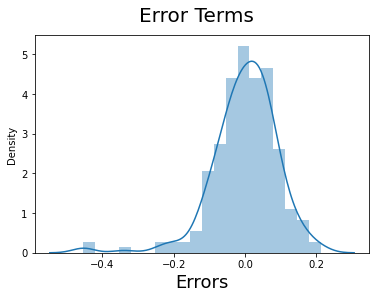

In [51]:
# Plot the distribution of errors
fig=plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

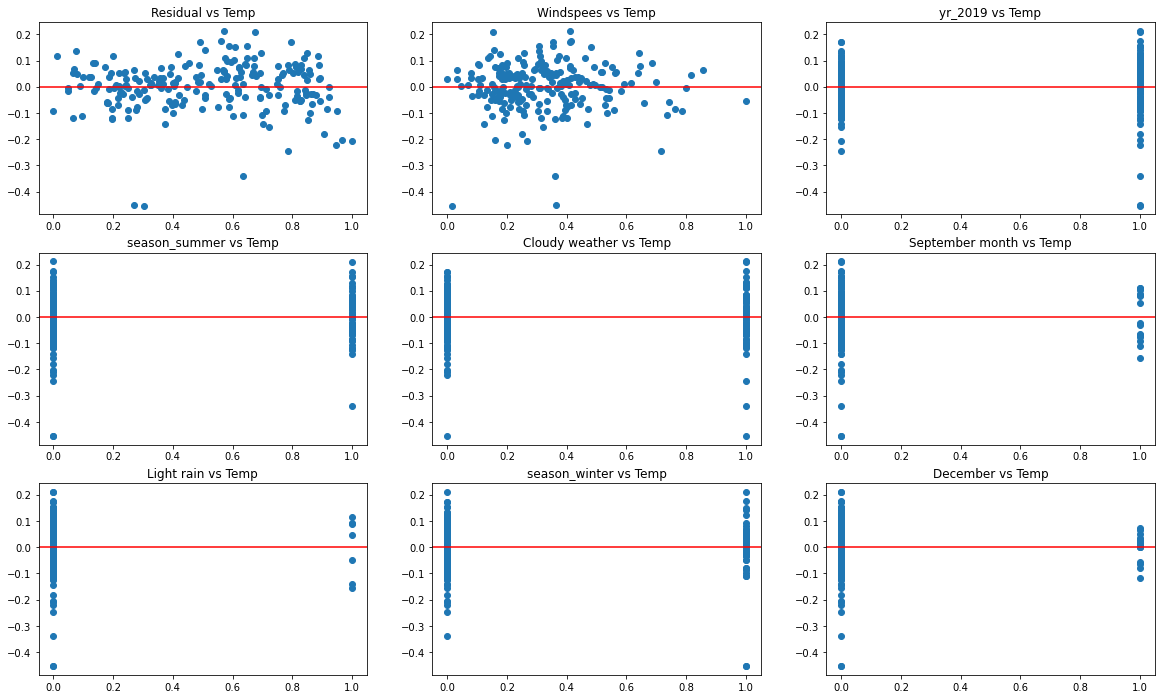

In [52]:
# Scatter Plot for all the residuals. Mostly all the means are being centered at 0

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
plt.scatter(X_train['temp'],res)
plt.title("Residual vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,2)
plt.scatter(X_train['windspeed'],res)
plt.title("Windspees vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,3)
plt.scatter(X_train['yr_2019'],res)
plt.title("yr_2019 vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,4)
plt.scatter(X_train['season_summer'],res)
plt.title("season_summer vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,5)
plt.scatter(X_train['weathersit_Cloudy'],res)
plt.title("Cloudy weather vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,6)
plt.scatter(X_train['mnth_Sep'],res)
plt.title("September month vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,7)
plt.scatter(X_train['weathersit_Light Rain'],res)
plt.title("Light rain vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,8)
plt.scatter(X_train['season_winter'],res)
plt.title("season_winter vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,9)
plt.scatter(X_train['mnth_Dec'],res)
plt.title("December vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

## Prediction on Test setup:
 - We need to so same scaling on the test set that we did on the prediction set.
 - We never use .fit on the test set because in ML we never use test set to make predictions or anything. Our test set is the unseen data and we still don't have it. We pretend we don't have that data.
 - We only transform on the test set and not fit.

In [53]:
#  Transform the numerical variables 
num_vars = ['temp','atemp','hum','casual','registered','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing the test set into x_test and y_test

In [54]:
# Splitting df_test into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [55]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)
X_test_m5.columns

Index(['const', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'yr_2019', 'holiday_No Holiday', 'workingday_Working Day',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Cloudy',
       'weathersit_Light Rain'],
      dtype='object')

In [56]:
X_test_m5 = X_test_m5.drop(['atemp','hum', 'casual', 'registered', 'holiday_No Holiday', 'workingday_Working Day', 'season_spring','mnth_Aug', 'mnth_Dec', 'mnth_Feb','mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May','mnth_Nov', 'mnth_Oct','weekday_Monday', 'weekday_Saturday','weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'], axis = 1)


In [57]:
# Making predictions using the fourth model
y_pred_m5 = lr_12.predict(X_test_m5)

ValueError: shapes (511,9) and (24,) not aligned: 9 (dim 1) != 24 (dim 0)

In [ ]:
r_squared = r2_score(y_test, y_pred_m5)
r_squared

In [58]:
# Plot the y_test and y_pred on a graphic
fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

NameError: name 'y_pred_m5' is not defined

<Figure size 432x288 with 0 Axes>